In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("./data/addresses.csv", sep=',', header=0)

### *__Base questions in the description for the ch_01 task:__*

1. **Which UK cities are currently underserved?**
2. **Whether their customers are primarily London based?**

#### *__First of all, I checked how many missing value there were, and since there weren’t a significant number, I removed those rows.__*

In [6]:
df.isna().sum()

company_id       0
address        968
total_spend      0
dtype: int64

In [7]:
df_na_dropped = df.dropna()

#### *__On the first attempt, I removed all characters from the `address`-es (line breaks, hyphens, spaces, etc.) that I deemed unnecessary and standardized the them.__*

In [8]:
df_na_dropped['address'] = df_na_dropped.loc[:, 'address'].str.replace('\n', '', regex=False).str.replace(' ', '').str.lower()

/var/folders/0c/b1vsc8l925dd81gfcwc5twmw0000gn/T/ipykernel_9942/3526383166.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_na_dropped['address'] = df_na_dropped.loc[:, 'address'].str.replace('\n', '', regex=False).str.replace(' ', '').str.lower()


In [9]:
df_na_dropped

,company_id,address,total_spend
0,1,"apartment2,52bedfordroad,london,england,sw47hj",5700
1,2,"107sheringhamavenue,london,n144uj",4700
2,3,"43sunningdale,yate,bristol,england,bs374hz",5900
3,4,"haweswaterhouse,lingleymerebusinesspark,lingle...",7200
4,5,"amberfieldbarnhouseamberlane,chartsutton,maids...",4600
...,...,...,...
99995,99996,"knapphouse,selsleywest,stroud,gloucestershire,...",4600
99996,99997,"20thebroadway,hamptoncourt,way,thamesditton,su...",4100
99997,99998,"marlandhouse,13huddersfieldroad,barnsley,south...",5600
99998,99999,"4mountscarview,scholes,holmfirthhuddersfield,w...",4600


#### *__As the next step, I created lists from the city names in the provided cities file, as specified in the task. I used an LLM for this, since I thought it would be faster than writing code.__*

In [10]:
england = [
"bath", "birmingham", "bradford", "brighton & hove", "bristol", "cambridge", "canterbury",
"carlisle", "chelmsford", "chester", "chichester", "colchester", "coventry", "derby",
"doncaster", "durham", "ely", "exeter", "gloucester", "hereford", "kingston-upon-hull",
"lancaster", "leeds", "leicester", "lichfield", "lincoln", "liverpool", "london",
"manchester", "milton keynes", "newcastle-upon-tyne", "norwich", "nottingham", "oxford",
"peterborough", "plymouth", "portsmouth", "preston", "ripon", "salford", "salisbury",
"sheffield", "southampton", "southend-on-sea", "st albans", "stoke on trent", "sunderland",
"truro", "wakefield", "wells", "westminster", "winchester", "wolverhampton", "worcester", "york"
]

northern_ireland = [
"armagh", "bangor", "belfast", "lisburn", "londonderry", "newry"
]

scotland = [
"aberdeen", "dundee", "dunfermline", "edinburgh", "glasgow", "inverness", "perth", "stirling"
]

wales = [
"bangor", "cardiff", "newport", "st asaph", "st davids", "swansea", "wrexham"
]

#### *__I also removed the characters from the `city` names that I considered unnecessary.__*

In [11]:
countries = [england, northern_ireland, scotland, wales]

for country in countries:
    for i, city in enumerate(country):
        country[i] = city.replace('-', '').replace(' ', '')

#### *__Based on the addresses, I created a `city` column, and where there was no city name in the address, I specified 'city_unknown'.__*

In [12]:
def find_city(address):
    all_cities = england + northern_ireland + scotland + wales
    for city in all_cities:
        if (f',{city},') in address:
            return city
    return 'city_unknown'

df_with_city_col = df_na_dropped.copy()

df_with_city_col.loc[:, 'city'] = df_with_city_col['address'].apply(find_city)

df_with_city_col

,company_id,address,total_spend,city
0,1,"apartment2,52bedfordroad,london,england,sw47hj",5700,london
1,2,"107sheringhamavenue,london,n144uj",4700,london
2,3,"43sunningdale,yate,bristol,england,bs374hz",5900,bristol
3,4,"haweswaterhouse,lingleymerebusinesspark,lingle...",7200,city_unknown
4,5,"amberfieldbarnhouseamberlane,chartsutton,maids...",4600,city_unknown
...,...,...,...,...
99995,99996,"knapphouse,selsleywest,stroud,gloucestershire,...",4600,city_unknown
99996,99997,"20thebroadway,hamptoncourt,way,thamesditton,su...",4100,city_unknown
99997,99998,"marlandhouse,13huddersfieldroad,barnsley,south...",5600,city_unknown
99998,99999,"4mountscarview,scholes,holmfirthhuddersfield,w...",4600,city_unknown


In [13]:
df_with_city_col.groupby('city')['total_spend'].sum().sort_values(ascending=False)

city
city_unknown        267132600
london              103141400
manchester            9441200
birmingham            9317900
glasgow               6293100
                      ...    
ripon                  120100
stasaph                 34900
kingstonuponhull        23400
brighton&hove            7400
stdavids                 6300
Name: total_spend, Length: 75, dtype: int64

In [14]:
all_cities_except_london_spend = df_with_city_col[df_with_city_col['city'] != 'london'].groupby('city')['total_spend'].sum().sum()

london_spend = df_with_city_col[df_with_city_col['city'] == 'london']['total_spend'].sum()

all_cities_spend = df_with_city_col['total_spend'].sum()

london_ratio = london_spend/all_cities_spend

print(f'All cities spend except London: {all_cities_except_london_spend}')
print(f'London spend: {london_spend}')
print(f'All cities spend: {all_cities_spend}')
print(f'London ratio to all cities: {london_ratio*100:.2f} %')

All cities spend except London: 387232700
London spend: 103141400
All cities spend: 490374100
London ratio to all cities: 21.03 %


In [15]:
total_spend_by_city = df_with_city_col.groupby('city')['total_spend'].sum().sort_values(ascending=False).reset_index()
total_spend_by_city['total_spend'] = total_spend_by_city['total_spend'] / 1_000_000
total_spend_by_city


,city,total_spend
0,city_unknown,267.1326
1,london,103.1414
2,manchester,9.4412
3,birmingham,9.3179
4,glasgow,6.2931
...,...,...
70,ripon,0.1201
71,stasaph,0.0349
72,kingstonuponhull,0.0234
73,brighton&hove,0.0074


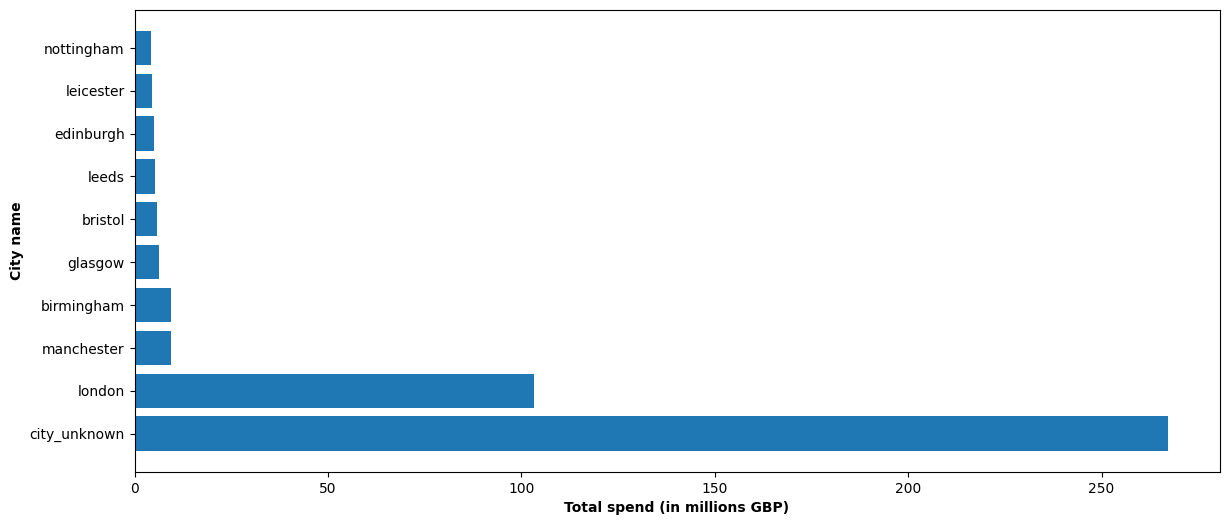

None

The TOP 5 most served cities are:


,city,total_spend
0,city_unknown,267.1326
1,london,103.1414
2,manchester,9.4412
3,birmingham,9.3179
4,glasgow,6.2931


The BOTTOM 5 least served cities are:


,city,total_spend
70,ripon,0.1201
71,stasaph,0.0349
72,kingstonuponhull,0.0234
73,brighton&hove,0.0074
74,stdavids,0.0063


In [16]:
fig, ax = plt.subplots(figsize=(14,6))

ax.barh(total_spend_by_city.head(10)['city'], total_spend_by_city.head(10)['total_spend'])
#ax.tick_params(axis='x', labelrotation=90)

ax.set_ylabel('City name', fontweight='bold')
ax.set_xlabel('Total spend (in millions GBP)', fontweight='bold')

display(plt.show())

print('The TOP 5 most served cities are:')
display(total_spend_by_city.head())

print('The BOTTOM 5 least served cities are:')
display(total_spend_by_city.tail(5))
